<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [46]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [47]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [48]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [49]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

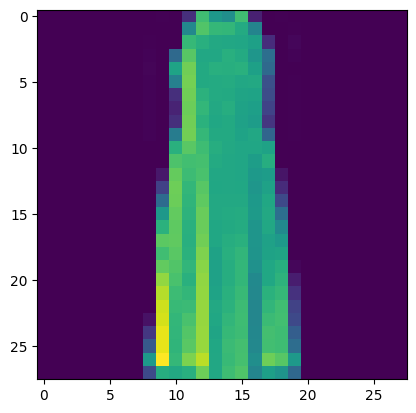

In [50]:
X_train

plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

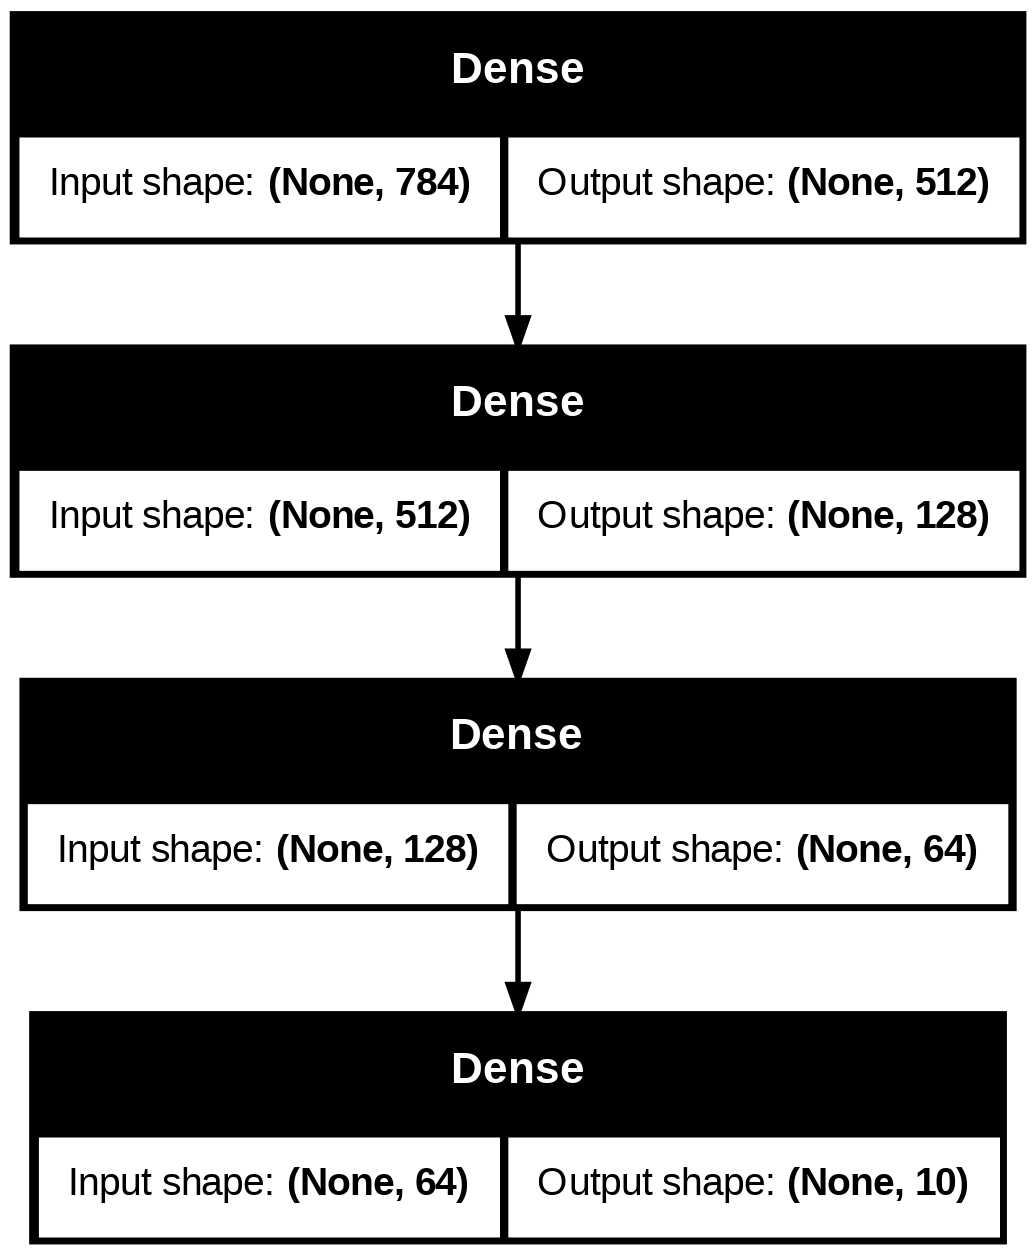

In [63]:
dims = X_train.shape[1]

nb_classes = 10

model = Sequential([
    Input(shape=(dims,)),
    Dense(512, activation='relu', name='layer-one'),
    Dense(128, activation='relu', name='layer-two'),
    Dense(64, activation='relu', name='layer-three'),
    Dense(nb_classes, activation='softmax', name='layer-four')
])


optimizer = keras.optimizers.Adam(learning_rate= 0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

In [64]:
n_epochs = 10
network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/10
352/352 - 7s - 20ms/step - accuracy: 0.1008 - loss: 10.2432 - val_accuracy: 0.1010 - val_loss: 2.3132
Epoch 2/10
352/352 - 9s - 26ms/step - accuracy: 0.0994 - loss: 2.3074 - val_accuracy: 0.1027 - val_loss: 2.3076
Epoch 3/10
352/352 - 6s - 16ms/step - accuracy: 0.0979 - loss: 2.3082 - val_accuracy: 0.0998 - val_loss: 2.3060
Epoch 4/10
352/352 - 5s - 13ms/step - accuracy: 0.0986 - loss: 2.3086 - val_accuracy: 0.0979 - val_loss: 2.3071
Epoch 5/10
352/352 - 5s - 15ms/step - accuracy: 0.1017 - loss: 2.3074 - val_accuracy: 0.1009 - val_loss: 2.3126
Epoch 6/10
352/352 - 10s - 27ms/step - accuracy: 0.0987 - loss: 2.3091 - val_accuracy: 0.1019 - val_loss: 2.3083
Epoch 7/10
352/352 - 6s - 17ms/step - accuracy: 0.1023 - loss: 2.3093 - val_accuracy: 0.1028 - val_loss: 2.3077
Epoch 8/10
352/352 - 5s - 13ms/step - accuracy: 0.0998 - loss: 2.3087 - val_accuracy: 0.1027 - val_loss: 2.3118
Epoch 9/10
352/352 - 5s - 15ms/step - accuracy: 0.1017 - loss: 2.3083 - val_accuracy: 0.1019 - val_los

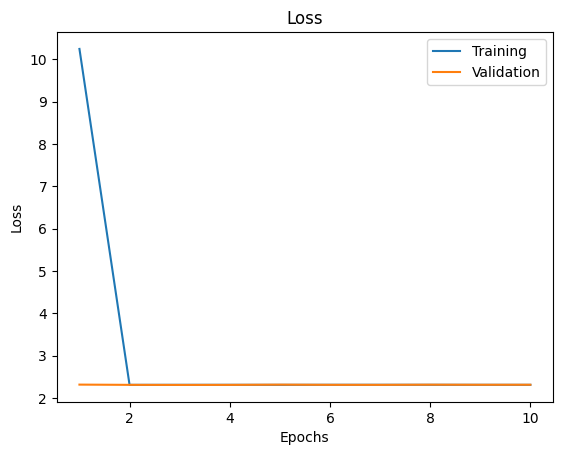

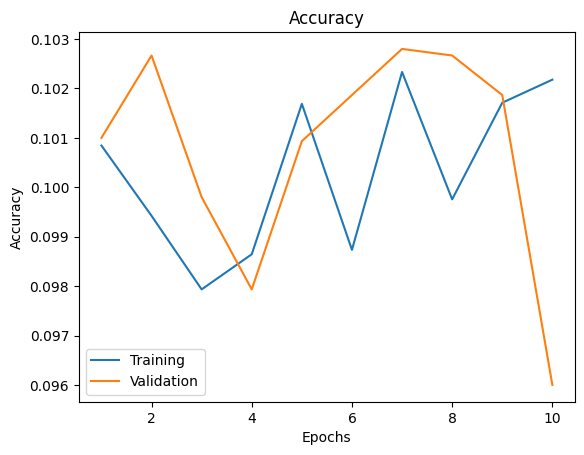

In [65]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(network_history)
plot_accuracy(network_history)